In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ballmdr', api_key='oSgf6vHed7evuaiXDdBb')

import fxcmpy
con = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')

def z(df):
    return (df - df.mean()) / df.std()

In [23]:
symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD', 'EUR/AUD', 'EUR/CAD', 'EUR/CHF', 'EUR/GBP', 'EUR/JPY', 'EUR/NZD', 'GBP/AUD', 'GBP/CAD', 'GBP/CHF', 'GBP/JPY', 'GBP/NZD', 'AUD/CAD', 'AUD/CHF', 'AUD/JPY', 'AUD/NZD', 'NZD/CAD', 'NZD/CHF', 'NZD/JPY', 'CAD/CHF', 'CAD/JPY', 'CHF/JPY']

In [24]:
df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='H1', number=100)
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2
    df[symbol]['Close_z'] = z(df[symbol]['Close'])

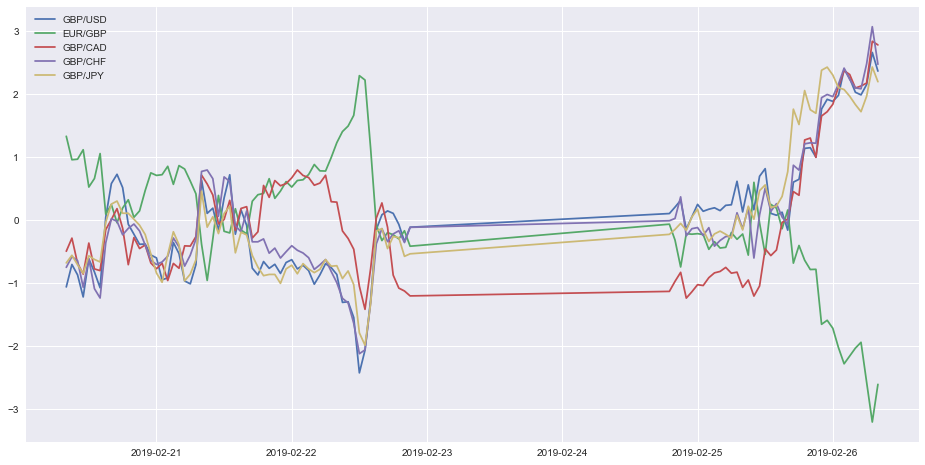

In [25]:
plt.figure(figsize=(16,8))
for symbol in symbols:
    if df[symbol].iloc[-1]['Close_z'] > 2 or df[symbol].iloc[-1]['Close_z'] < -2:
        plt.plot(df[symbol]['Close_z'], label=symbol)
plt.legend()

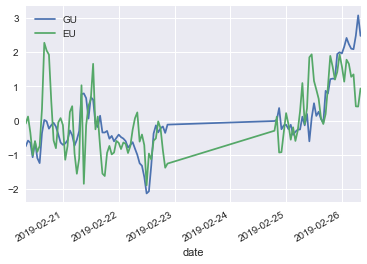

In [32]:
df['GBP/CHF']['Close_z'].plot(label='GU')
df['EUR/USD']['Close_z'].plot(label='EU')
plt.legend()
plt.show()